In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [4]:
import pandas as pd

df = pd.read_csv(path + "/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The description of the data set said the given info except amount and class transformed using PCA(or eigen matrix) to conceal the info of the users and this lets us use only some of the columns but lose only some information in the process. So there is no need of using PCA again.

In [12]:
df[df['Class'] == 1].shape[0]

492

In [13]:
df[df['Class'] == 0].shape[0]

284315

There are far more non fraudulent transactions than fraudulent. So if we train the model using this data the fraudulent points will be a minority and will not be predicited by the model. So we will train the model using a smaller data set with less of an oversampling.

In [14]:
df = df.drop('Time', axis=1)

In [25]:
df_sample_0 = df[df['Class'] == 0].sample(n=10000, random_state= 8)
df_sample = pd.concat([df_sample_0, df[df['Class'] == 1]])
X = df_sample.drop('Class', axis=1)
y = df_sample['Class']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [27]:
kernals = {'linear', 'rbf', 'poly'}

In SVM we try to find the best curve which can differentiate various classes, here are we are trying to find the best curve among linear, polynomial, and rbf.

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for kernal in kernals:
  model = SVC(kernel=kernal)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(kernal)
  print(accuracy_score(y_test, y_pred))

poly
0.9623630300142926
linear
0.9890424011434016
rbf
0.9809433063363506


It looks like the best fit line to differentiate between the two classes.

<Axes: xlabel='V1', ylabel='V2'>

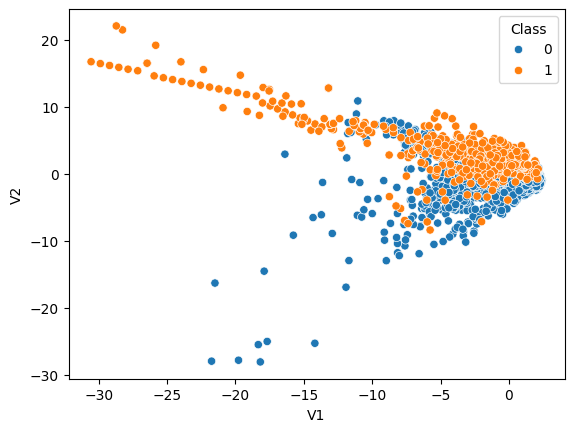

In [32]:
import seaborn as sns

sns.scatterplot(data=df_sample, x='V1', y='V2', hue='Class')

The plot would have been more accurate if we knew the square root of the eigen value of each column, then we could choos the top 2 columns and used it.